In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Midterm Project for DATA 11800 - Winter 2024 (Due Feb. 16th)

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing (including any use of generative AI). The score will be based on:
-  Clarity and soundness of the arguments and conclusions;
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the data vizualizations, summaries used, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.


### The Data

The data you will be exploring in this project comes from "Monitoring the Future: A Continuing Study of American Youth", 

*"This survey of 12th-grade students is part of a series that explores changes in important values, behaviors, and lifestyle orientations of contemporary American youth. Students are randomly assigned to complete one of six questionnaires, each with a different subset of topical questions, but all containing a set of "core" questions on demographics and drug use."*

The data can be downloaded from the link below
https://www.icpsr.umich.edu/web/ICPSR/studies/38882

Click on 'Download' and then 'Delimited'.

You will have to make an account and agree to the corresponding terms and conditions to have access to the data. Note you will get a folder called "ICPSR_38882". This folder contains the codebook that describes the study and the variables in detail. This folder is also how you will get the data itself.

We put together a smaller list of variables and their column names and descriptions available on the canvas midterm assignment. The variables in the excel sheet are a subset of the entire data, but if your interests lie in exploring the full dataset, or you want to explore different variables, you are not limited to just the variables in the short list.


You can (but are not required to) use any additional data you can find to get insight into this issue, but you need to specify the provenance of that data in your report. For example, this is part of an ongoing study, so you could look at the data from past years.


### The Assignment

#### Report on your findings about High School Seniors

You must submit two files:

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit any additional data you used, but just indicate how you obtained it in the Notebook.

2. A report of your findings. **This report should be at most 4 pages long including references.** Use data visualization and data summaries to justify your conclusions. Note that the page limitation means you will not show all analyses you will make - select carefully what you think is most relevant.

The report should address the following points:

A.  **Introduce the dataset**.  Describe the data. Where does it come from? Why was it collected (what are the researchers interested in studying)? Was it an experiment? A retrospective observational study? A prospective observational study? How many variables are there in the full dataset? List a few. How many observations (i.e. rows)? How many students participated? Describe the sampling process. Using what you have learned about data collection is this a biased or unbiased sample? Why?

B.  **Characteristics of sample**. Describe the sample of students and high schools in the dataset.  Summarize the distributions of 3 or more of the characteristics (variables) of the people and households.  Some interesting variables you may consider include: Days missed from school, Career Outlook, Grade Point Average, Drinking or Drug Usage, etc. You should include a graph or table for each distribution. You should create at least one graph and at least one table (DataFrame).

C. **Relationships between variables.**  Now, shift focus from distributions of single variables to relationships between variables. You should investigate at least 2 of the student characteristics (race, sex, lifestyle, etc.) and at least two opinion questions (agree/disagree, satisfaction level, etc.).  For example, do you find evidence that outlook of the future differs by gender, or parent education level affects grade point average. Include two or more graphs or tables here. Describe any associations you find. During your exploration you should create at least one new column in the DataFrame based on existing variables in the dataset. To do this, you should write a function (or more than one if you like) and apply it to one or more columns of the dataset.

D. **Provide context**  To the best of your knowledge, what do the relationships you discovered imply? Do you think the associations are causal? Provide a potential explanation for the associations (or lack thereof) you observe. What are some potential confounders and colliders that may explain the relationships? Identify one potential confounder and one potential collider for a chosen relationship. What are some questions that you would like to answer but are unable to with the current data set alone?  What data would you need to be able to answer them?

E. **Conclusion/Self-Assessment** What did you learn from exploring this dataset?

Your submission is to be uploaded to Canvas and Gradescope. **If you do not submit both a report and a ipynb code notebook, you will automatically recieve a deduction of 20 points from your submission.**
There are some minimum requirements for your submission:

1. Upload your report in PDF or DOC format to Canvas
2. Upload the jupyter notebook containing your analysis code to Gradescope, in .ipynb format.
3. The report should be 4 pages maximum, including bibliography, tables and figures.
4. If your report uses outside results and/or data, proper citations must be provided.
    


You may use the following code to help you load in the data.

In [2]:
#we need to read a tab separated values (tsv file)
Core_df = pd.read_csv("ICPSR_38882/DS0001/38882-0001-Data.tsv", sep='\t')
DS2 = pd.read_csv("ICPSR_38882/DS0002/38882-0002-Data.tsv", sep='\t')
DS3 = pd.read_csv("ICPSR_38882/DS0003/38882-0003-Data.tsv", sep='\t')
DS4 = pd.read_csv("ICPSR_38882/DS0004/38882-0004-Data.tsv", sep='\t')
DS6 = pd.read_csv("ICPSR_38882/DS0006/38882-0006-Data.tsv", sep='\t')

A few notes, hints, that may be helpful as you are working with this data.
1. Take a look at the codebook. It has a lot of information about the survey itself and the variable names. We have put together a spreadsheet of selected variables to make it easier to see the variables present.
2. The Core data contain questions that everyone in the survey answered. The other forms: DS2, DS3, DS4, DS6 were answered by a subset of people. If you are interested in a variable in the Core data and how that variable interacts with a variable in DS3, then you can merge on Respondent ID to cross classify those variables. (please see the codebook for more info here)
3. The variable outcomes are encoded as numeric values. To see the corresponding outputs, you will need to look at the spreadsheet or the codebook, including how missing data was handled in the survey.
4. There are numerous variables that are not in the spreadsheet but included in the survey. If you are interested you can include any variable of interest from the survey.

In [3]:
Core_df

,RESPONDENT_ID,V1,V3,V545,V548,V549,V550,RANDOM_GROUP,ARCHIVE_WT,V13,...,V2138D,V2139D,V2140D,V2141D,V2142D,V2143D,V2144D,V2145D,V2146D,V2147D
0,10001,2022,1,3,4,3,0,2,1.672514,3,...,0,0,0,0,0,0,0,-9,-9,-9
1,10002,2022,1,3,4,3,0,1,1.687163,3,...,0,0,0,0,0,0,0,-9,-9,-9
2,10003,2022,1,3,4,3,0,1,1.619756,3,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,10004,2022,1,3,4,3,0,2,1.494907,3,...,0,0,0,0,0,0,0,-9,-9,-9
4,10005,2022,1,3,4,3,0,1,1.715507,3,...,0,0,0,0,0,0,0,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,61669,2022,6,3,4,1,0,2,0.636597,2,...,0,0,0,0,0,0,0,-9,-9,-9
9595,61670,2022,6,3,4,1,0,1,0.632593,2,...,0,0,0,0,1,1,1,-9,-9,-9
9596,61671,2022,6,3,4,1,0,1,0.633253,2,...,0,0,0,0,0,0,0,-9,-9,-9
9597,61672,2022,6,3,4,1,0,1,0.612733,2,...,0,0,0,0,0,0,0,-9,-9,-9


In [4]:
DS2

,RESPONDENT_ID,V1,V3,V545,V548,V549,V550,RANDOM_GROUP,ARCHIVE_WT,V13,...,V1797,V1798,V1799,V1800,V1801,V1802,V1803,V1804,V1972,V1973
0,10001,2022,1,3,4,3,0,2,1.672514,3,...,3,3,3,3,2,3,3,3,3,3
1,10002,2022,1,3,4,3,0,1,1.687163,3,...,3,3,3,3,3,3,3,3,3,3
2,10003,2022,1,3,4,3,0,1,1.619756,3,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,10004,2022,1,3,4,3,0,2,1.494907,3,...,3,3,3,3,1,2,3,2,1,1
4,10005,2022,1,3,4,3,0,1,1.715507,3,...,3,3,3,3,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,11542,2022,1,3,4,1,0,1,0.679312,2,...,2,2,2,2,2,2,2,2,2,2
1532,11543,2022,1,3,4,1,0,2,0.678884,2,...,3,3,3,3,1,3,3,3,3,3
1533,11544,2022,1,3,4,1,0,1,0.652554,2,...,3,3,3,3,1,3,3,3,2,3
1534,11545,2022,1,3,4,1,0,2,0.665386,2,...,1,1,1,1,1,1,1,1,1,1


In [5]:
DS4

,RESPONDENT_ID,V1,V3,V545,V548,V549,V550,RANDOM_GROUP,ARCHIVE_WT,V13,...,V3640,V3611,V3612,V3613,V3614,V3615,V3644,V3632,V3645,V3646
0,30001,2022,3,3,4,3,0,2,1.574447,3,...,8,3,3,3,3,3,3,3,3,3
1,30002,2022,3,3,4,3,0,2,1.663573,3,...,7,3,2,3,3,3,3,3,3,3
2,30003,2022,3,3,4,3,0,2,1.708082,3,...,8,2,2,2,2,2,2,2,2,2
3,30004,2022,3,3,4,3,0,1,1.554570,3,...,8,2,2,2,2,1,2,2,2,2
4,30005,2022,3,3,4,3,0,1,1.590253,3,...,8,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,31604,2022,3,3,4,1,0,2,0.694135,2,...,8,3,3,3,3,3,3,3,3,3
1589,31605,2022,3,3,4,1,0,2,0.642961,2,...,7,3,1,2,2,3,2,3,1,2
1590,31606,2022,3,3,4,1,0,2,0.677762,2,...,8,3,3,3,3,2,3,3,3,3
1591,31607,2022,3,3,4,1,0,1,0.592244,2,...,8,3,3,3,3,2,3,3,3,3


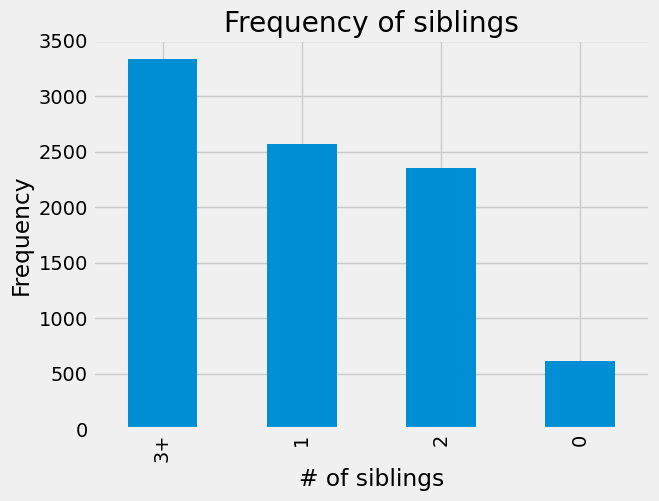

,RESPONDENT_ID,# of siblings
0,10001,1
1,10002,2
2,10004,3+
3,10005,2
4,10006,3+
...,...,...
8862,61669,1
8863,61670,2
8864,61671,3+
8865,61672,1


In [13]:
sibling_df = Core_df[['RESPONDENT_ID', 'V49']].copy()
sibling_df = sibling_df[sibling_df['V49'] != -9]
sibling_df['V49'] = sibling_df['V49'].replace(3, '3+')
sibling_df.rename(columns={"V49": "# of siblings"}, inplace = True)
sibling_df.reset_index(drop=True, inplace=True)
sib_counts = sibling_df['# of siblings'].value_counts()
sib_counts.plot(kind='bar')
plt.xlabel('# of siblings')
plt.ylabel('Frequency')
plt.title('Frequency of siblings')
plt.savefig("graph_sib.png", bbox_inches='tight')
plt.show()
sibling_df

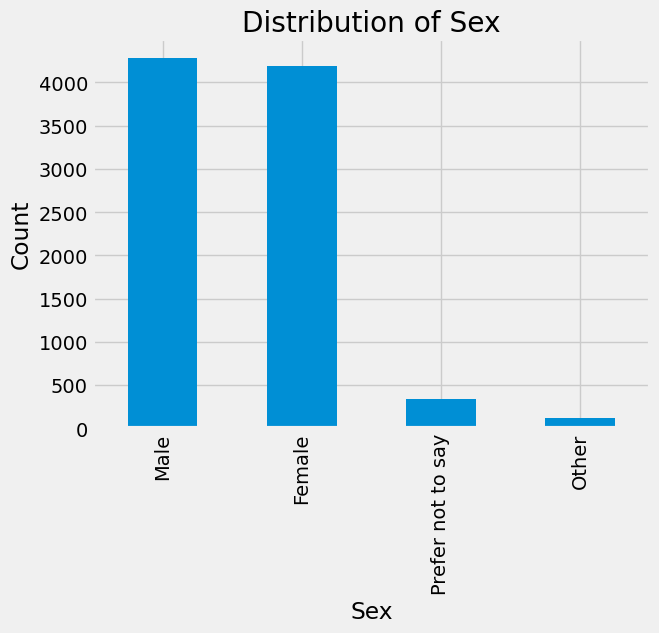

In [7]:
sex_df = Core_df[['RESPONDENT_ID', 'V2150']].copy()
sex_df = sex_df[sex_df['V2150'] != -9]
sex_df['V2150'] = sex_df['V2150'].replace({1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'})
sex_df.rename(columns={"V2150": "Sex"}, inplace = True)
sex_df.reset_index(drop=True, inplace=True)
sex_df

sex_counts = sex_df['Sex'].value_counts()
sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.savefig("graph_sex.png", bbox_inches='tight')
plt.show()


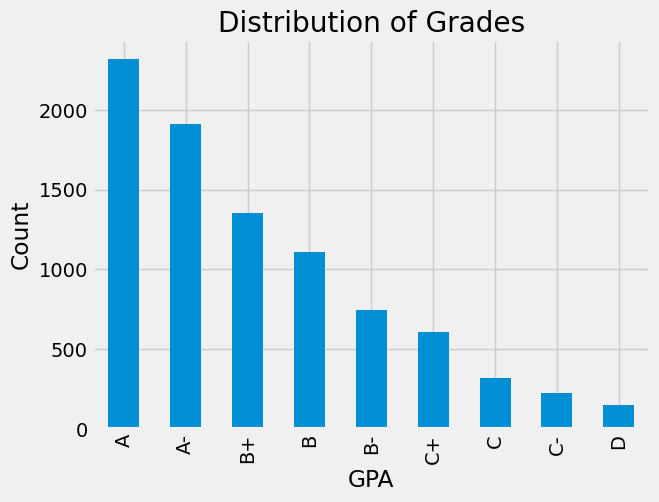

In [8]:
gpa_df = Core_df[['RESPONDENT_ID', 'V2179']].copy()
gpa_df = gpa_df[gpa_df['V2179'] != -9]
gpa_df['V2179'] = gpa_df['V2179'].replace({1: 'D', 2: 'C-', 3: 'C', 4: 'C+',5: 'B-', 6: 'B', 7: 'B+', 8: 'A-',9:'A'})
gpa_df.rename(columns={"V2179": "GPA"}, inplace = True)
gpa_df.reset_index(drop=True, inplace=True)
gpa_df

gpa_counts = gpa_df['GPA'].value_counts()
gpa_counts.plot(kind='bar')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.title('Distribution of Grades')
plt.savefig("graph_gpa.png", bbox_inches='tight')
plt.show()

In [9]:
def sat_avg(row):
    """
    Calculate the average of the satisfaction values while excluding missing time(-9) for each row.
    
    Parameters:
        row (Series): Input row of the DataFrame.
        
    Returns:
        float: The average of valid values
    """
    count = 0
    total = 0
    for value in row: 
        if value != -9:
            total += value
            count += 1
    if count == 0:
        return 0
    return total/count

This is the function for Part C.

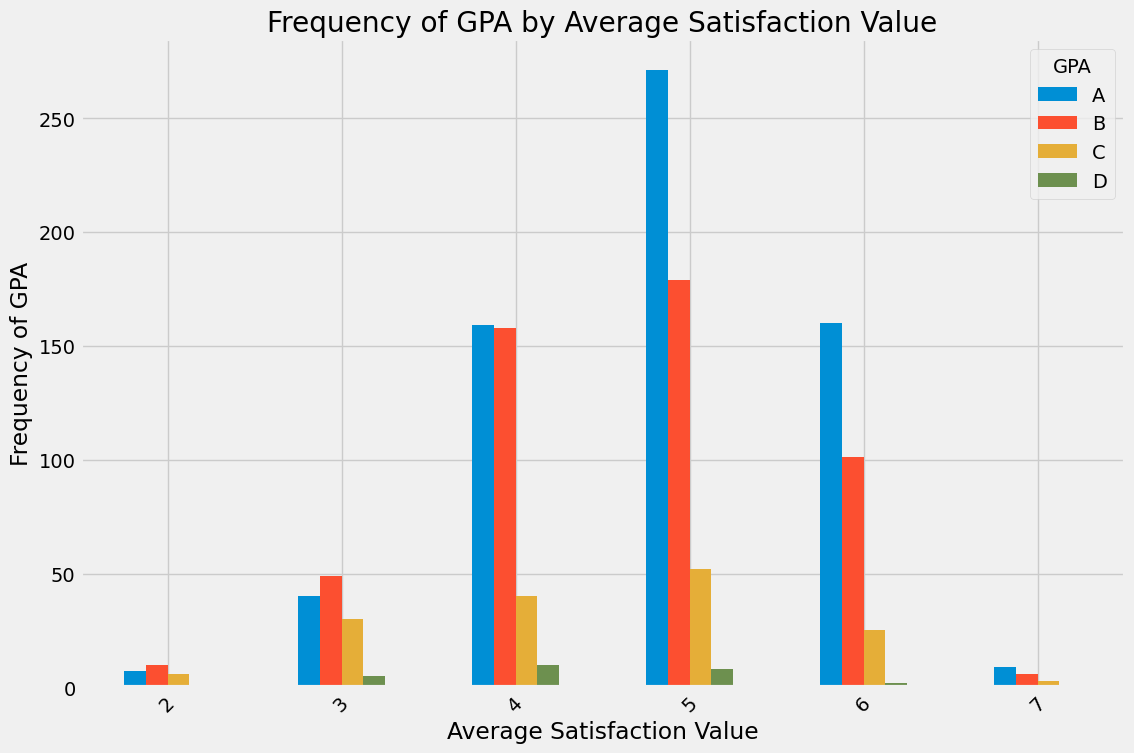

In [10]:
sat_df = DS2.loc[:, 'V1641':'V1654']
sat_df['SAS_Avg'] = sat_df.apply(sat_avg, axis=1)
sat_df = pd.merge(sat_df, DS2[['RESPONDENT_ID']], left_index=True, right_index=True, how='left')
sat_df = pd.merge(sat_df, Core_df[['RESPONDENT_ID', 'V2179']], on='RESPONDENT_ID', how='left')
sat_df['V2179'] = sat_df['V2179'].replace({1: 'D', 2: 'C-', 3: 'C', 4: 'C+',5: 'B-', 6: 'B', 7: 'B+', 8: 'A-',9:'A'})
sat_df.rename(columns={"V2179": "GPA"}, inplace = True)
sat_df = sat_df[(sat_df['GPA'] != -9) & (sat_df['SAS_Avg'] != 0)]
sat_df['SAS_Avg'] = sat_df['SAS_Avg'].astype(int)
sat_df['GPA'] = sat_df['GPA'].str.rstrip('+-')
sat_df

grouped = sat_df.groupby(['SAS_Avg', 'GPA']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('Average Satisfaction Value')
plt.ylabel('Frequency of GPA')
plt.title('Frequency of GPA by Average Satisfaction Value')
plt.xticks(rotation=45)
plt.legend(title='GPA')
plt.savefig("graph_gpasa.png", bbox_inches='tight')
plt.show()

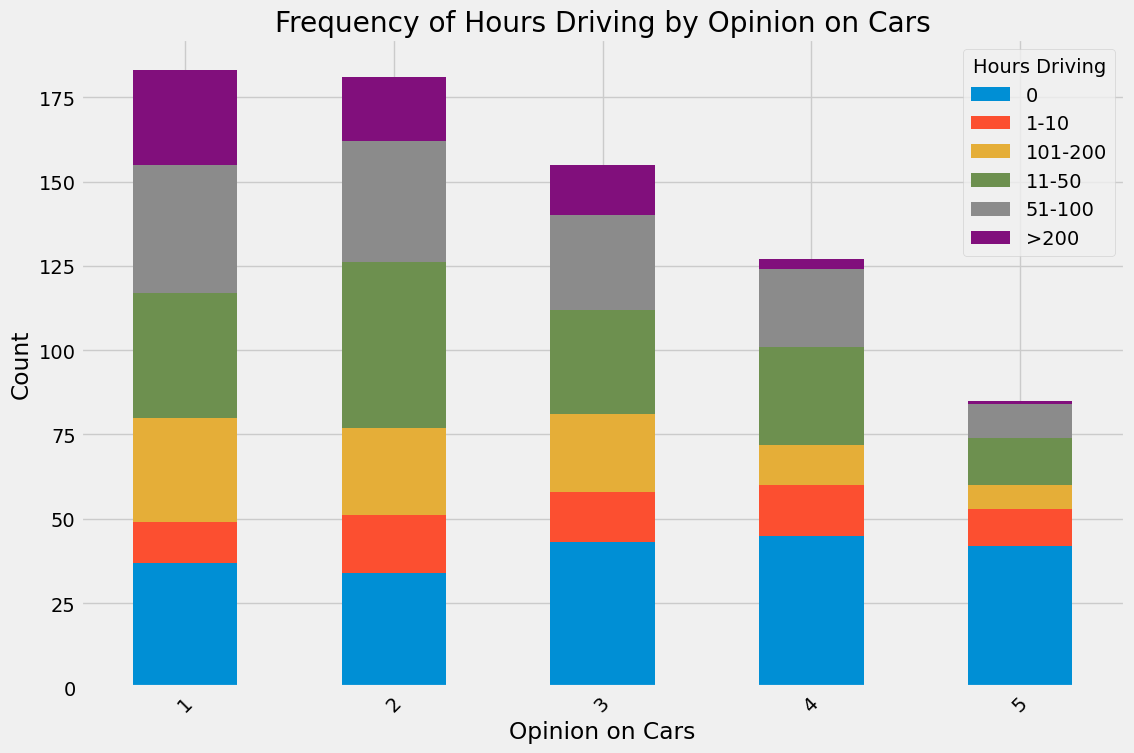

In [11]:
car_df = pd.merge(Core_df[['RESPONDENT_ID', 'V2196']], DS4[['RESPONDENT_ID', 'V3651']], on='RESPONDENT_ID', how='inner')
car_df.rename(columns={'V2196': 'Hours Driving', 'V3651': 'Opinion on Cars'}, inplace=True)
car_df = car_df[car_df['Hours Driving'] != -9]
car_df = car_df[~car_df['Opinion on Cars'].isin([-9, -8])]
car_df['Hours Driving'] = car_df['Hours Driving'].replace({
    1: '0',
    2: '1-10',
    3: '11-50',
    4: '51-100',
    5: '101-200',
    6: '>200'
})
car_df

pivot_df = car_df.groupby(['Opinion on Cars', 'Hours Driving']).size().unstack(fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Frequency of Hours Driving by Opinion on Cars')
plt.xlabel('Opinion on Cars')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Hours Driving')
plt.savefig("graph_car.png", bbox_inches='tight')
plt.show()


https://pandas.pydata.org/docs/reference/frame.html and Chat-GPT were referenced for code documentation.